![Github_top](https://user-images.githubusercontent.com/33735397/206313977-e67ba652-3340-4a1b-b1d1-141d8d5001f2.PNG)

# Welcome to the Community Streamflow Evaluation System (CSES)

National-scale streamflow modeling remains a modern challenge, as changes in the underlying hydrology from land use and land cover (LULC) change, anthropogenic streamflow modification, and general process components (reach length, hydrogeophysical processes, precipitation, temperature, etc) greatly influence  hydrological modeling.
In a changing climate, there is a need to anticipate flood intensity, impacts of groundwater depletion on streamflow, western mountain low-flow events, eastern rain-on-snow events, storm-induced flooding, and other severe environmental problems that challenge the management of water resources.
Given the National Water Model (NWM) bridges the gap between the spatially coarse USGS streamflow observations by providing a near-continuous 2.7 million reach predictions of streamflow, there lies the potential to improve upon the capabilities of the model by characterizing predictive performance across the heterogeneity of processes and land covers present at the national scale. 
The Python-based Research-Oriented Streamflow Evaluation Tool (ROSET) package provides a tool to evaluate national hydrography dataset (nhd) based model outputs with colocated USGS/NWIS streamflow monitoring stations (parameter: 060). 
The package contains three key methods for evaluation: state-based LULC, HUC level analysis, and USGS station-based analysis.
Below is a description of each method and application.
While designed to use the NWM version 2.1 retrospective dataset, with minimal modification the tool should be able to take in other model formulations.
By using the ROSET, researchers can identify locations where a model may benefit from further training/calibration/parameterization or a need for new model processes/features (e.g., integration of reservoir release operations) to ultimately create new post-processing methods and/or hydrological modeling formulations to improve streamflow prediction capabilities with respect to modeling needs (e.g., stormflow, supply, emergency management, flooding, etc).   


In [2]:
from Community_Eval_Methods import Reach_Eval
import os
import warnings
warnings.filterwarnings("ignore")
#set path directory
cwd = os.getcwd()

# Streamflow Evaluation: Reach Class

This section of code allows the user to evaluate modeled streamflow with selected NWIS monitoring sites of interest. 
The user can input multiple USGS sites (e.g., ['02378780', '02339495', '02342500'])
Please enter a start date, end date, and model to compare (NWM v2.1 is set up).
NWM retrospective data spans from 1980 - 2020, USGS/NWIS data is location dependent.

![REach_Eval_top](https://user-images.githubusercontent.com/33735397/206324095-dcc59508-bf4c-43a8-9a19-4fc5c573e205.PNG)

In [2]:
#Put in model of interest for evaluation, NWIS/USGS site id(s), and the start/end date

model = 'NWM_v2.1'
#example with list of USGS sites along the Provo River, Utah
#NWIS_list = ['10155000', '10155200'] #, '10155500', '10155200', '10154200']
NWIS_list = ['10126000', '10130500', '10134500', '10136500', '10137500', '10141000', '10155000', '10164500', '10171000' ] # 02450000 is a bad site and good for breaking ROSET
#plot list of top performing sites
Eval_Metric = 'KGE'
#Performance_Threshold = 0.70
#NWIS_list = HUC_Eval.Eval[HUC_Eval.Eval[Eval_Metric] >Performance_Threshold]['NWIS_site_id'].values.tolist()

startDT ='2020-1-01'
endDT ='2020-9-30'
#set path directory
cwd = os.getcwd()


Reach_Eval = Reach_Eval.Reach_Eval(model , NWIS_list, startDT, endDT, cwd)

#Get Streamstats and colocated NHD reaches
Reach_Eval.get_NHD_Model_info()

#Get USGS and NWM data
Reach_Eval.prepare_comparison()

Getting geospatial information for NHD reaches


Dropping USGS sites with no NHD reach
Getting  NWM_v2.1  data


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


## Interactive plotting on map
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [3]:
#Plot the locations
Reach_Eval.Map_Plot_Eval('D', supply = True)

Plotting monitoring station locations


## Interactive time series plotting
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

,NWIS_site_id,NHD_reachid,Location,RMSE,MaxError,MAPE,KGE,Drainage_area_mi2,Mean_Basin_Elev_ft,Perc_Forest,Perc_Imperv,Perc_Herbace,Mean_Ann_Precip_in,Ann_low_cfs,Ann_mean_cfs,Ann_hi_cfs
0,10137500,10274270,"SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT",12665,17719,32.085769,0.527676,137.0,7220.0,26.3,0.0253,21.90,35.5,32.6,115.0,259.2
1,10155000,10373622,"PROVO RIVER NEAR HAILSTONE, UT",53903,87577,30.930574,0.428101,229.0,8640.0,74.4,0.1300,3.19,29.6,81.9,273.0,449.0
2,10126000,4605050,"BEAR RIVER NEAR CORINNE, UT",260700,492167,41.649975,-0.068681,7040.0,6620.0,15.6,0.5500,15.20,22.2,402.5,1581.0,4989.0
3,10130500,10092262,"WEBER RIVER NEAR COALVILLE, UT",58781,84382,130.982670,-0.923229,NaN,NaN,NaN,NaN,NaN,NaN,81.9,204.0,479.2
4,10134500,10277268,"EAST CANYON CREEK NEAR MORGAN, UT",38787,59585,365.078021,-1.660914,152.0,7090.0,60.9,1.6500,4.68,25.8,18.7,60.0,148.4
5,10136500,10274616,"WEBER RIVER AT GATEWAY, UT",201360,317036,307.810050,-1.702048,1620.0,7170.0,40.2,0.4400,11.00,25.8,112.8,496.0,1444.0
6,10164500,10329013,AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK...,27950,40829,140.109450,-2.288515,51.1,8470.0,71.5,0.0173,3.42,39.4,16.8,53.0,111.8
7,10141000,10273232,"WEBER RIVER NEAR PLAIN CITY, UT",341143,564549,306.647778,-5.368677,NaN,NaN,NaN,NaN,NaN,NaN,50.3,441.0,1522.0
8,10171000,10390290,"JORDAN RIVER @ 1700 SOUTH @ SALT LAKE CITY, UT",1154315,1825813,2578.714340,-32.174253,3430.0,6440.0,41.7,4.3700,6.35,21.4,100.9,138.0,225.2


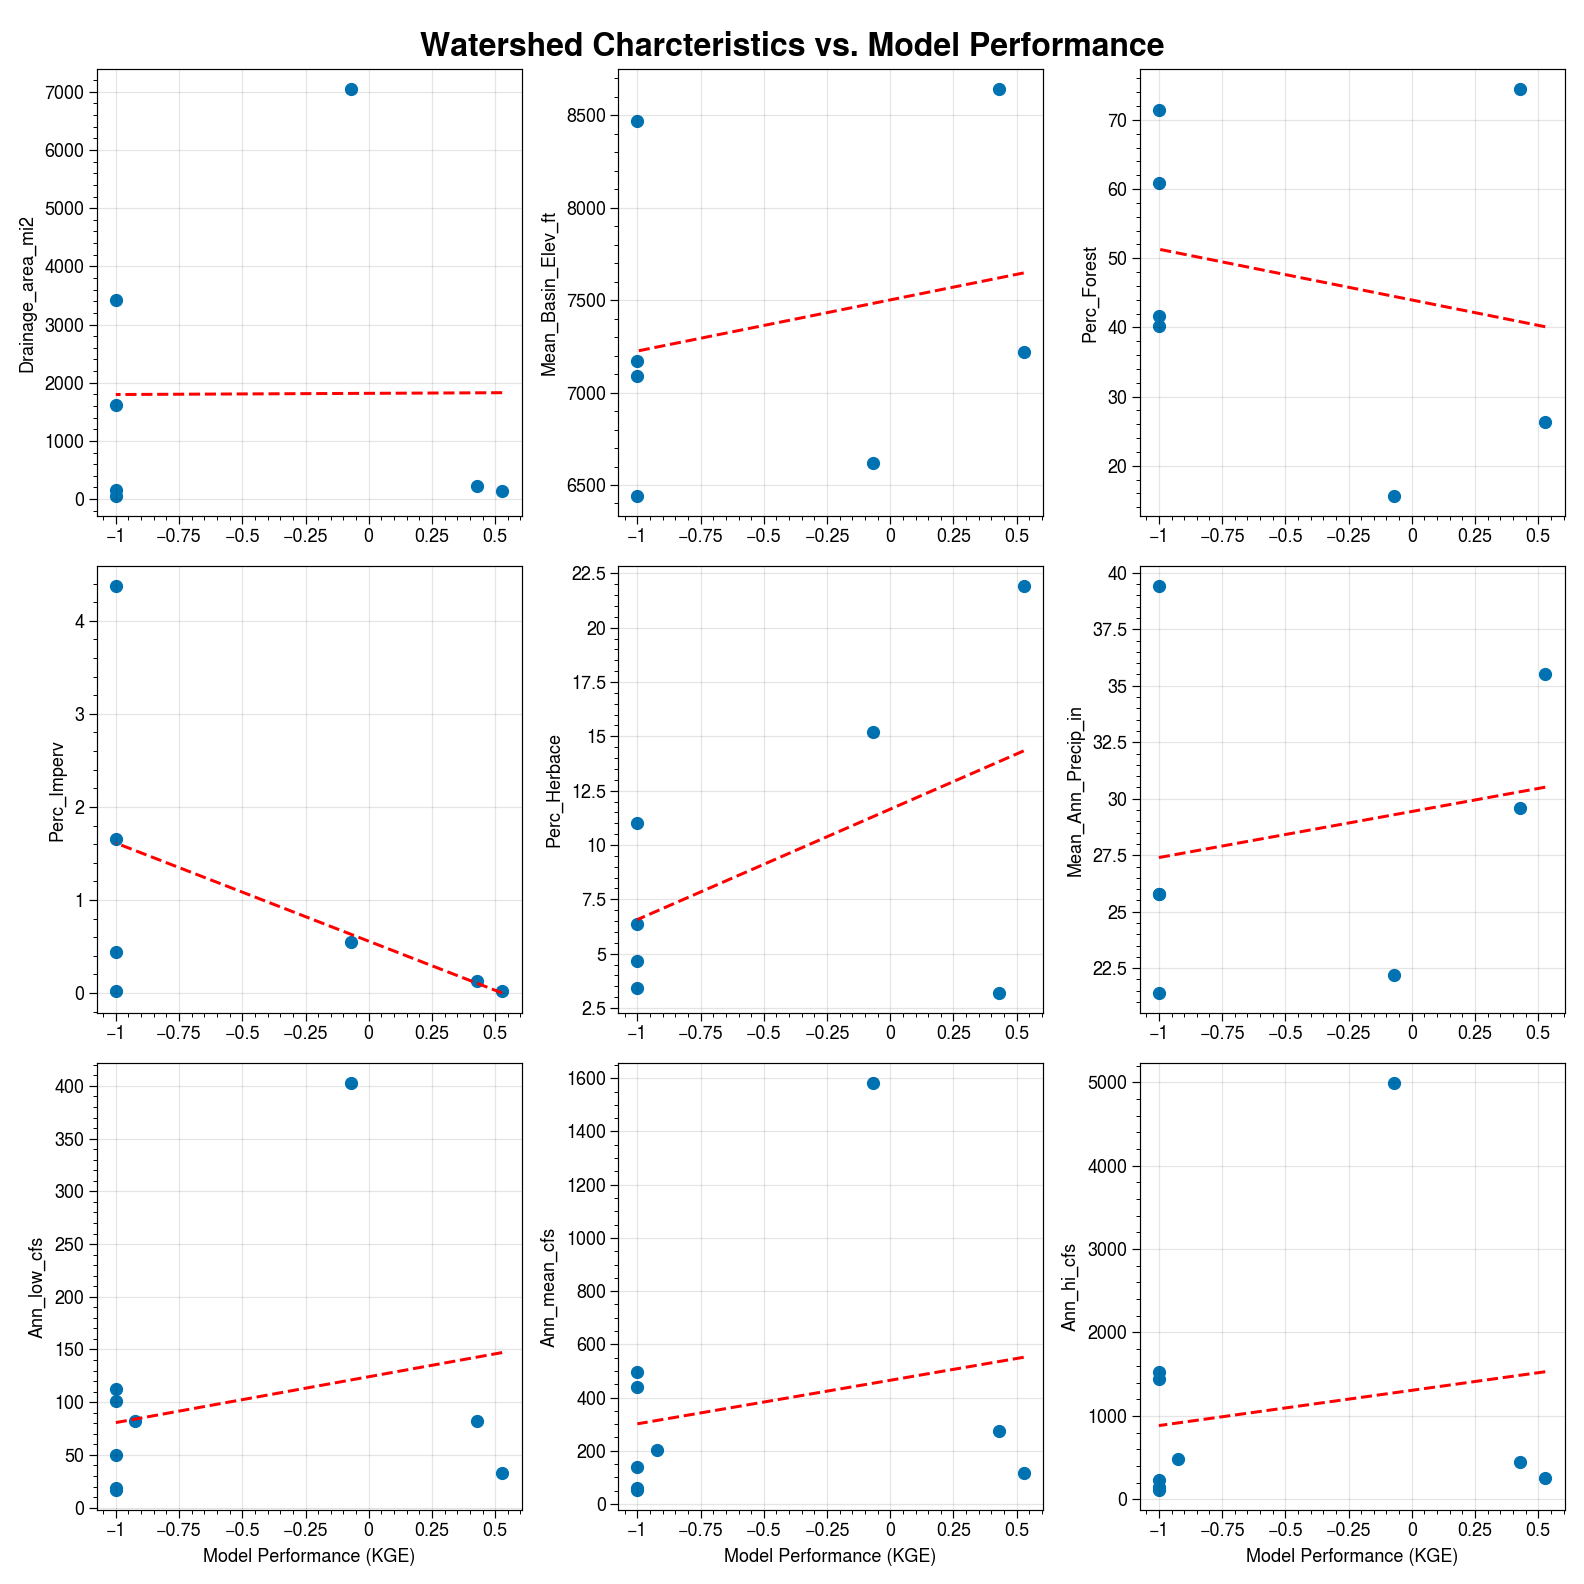

SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT


,USGS: 10137500,NWM_v2.1: 10274270
Datetime,,
2020-01-31,1955.532783,2316.144
2020-02-29,3992.262636,4219.824
2020-03-31,10333.489704,6123.504
2020-04-30,23711.551409,12288.651
2020-05-31,38118.379124,20399.121
2020-06-30,42512.740229,26461.152
2020-07-31,47127.478667,31642.731
2020-08-31,51589.263823,35904.198
2020-09-30,54669.346959,39245.553


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10137500               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10274270 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

PROVO RIVER NEAR HAILSTONE, UT


,USGS: 10155000,NWM_v2.1: 10373622
Datetime,,
2020-01-31,5261.741773,5683.278
2020-02-29,10299.652399,10444.461
2020-03-31,17949.000150,15039.072
2020-04-30,34054.570796,21233.964
2020-05-31,134463.094834,55789.722
2020-06-30,173327.601455,85750.869
2020-07-31,176631.665710,103708.917
2020-08-31,178623.824675,116945.442
2020-09-30,180945.402533,126213.984


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155000               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10373622 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

BEAR RIVER NEAR CORINNE, UT


,USGS: 10126000,NWM_v2.1: 4605050
Datetime,,
2020-01-31,89206.495168,67059.111
2020-02-29,181723.304248,126360.726
2020-03-31,338843.830101,190572.249
2020-04-30,456117.623388,258150.906
2020-05-31,531465.098664,465053.160
2020-06-30,589257.764805,749351.904
2020-07-31,615152.913974,926540.886
2020-08-31,630196.486154,1051765.353
2020-09-30,654324.690391,1146491.280


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10126000              :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_4605050 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                           :Rectangles   [x0,y0,x1,y1]
      .Text.I                                 :Text   [x,y]
      .Text.II                                :Text   [x,y]
      .Text.III                               :Text   [x,y]
      .Text.IV                                :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

WEBER RIVER NEAR COALVILLE, UT


,USGS: 10130500,NWM_v2.1: 10092262
Datetime,,
2020-01-31,2367.371551,6484.410
2020-02-29,6368.849578,12252.957
2020-03-31,18509.477866,19401.672
2020-04-30,23335.157978,49535.340
2020-05-31,28176.962338,86799.876
2020-06-30,41010.525240,120966.966
2020-07-31,52769.735922,137152.212
2020-08-31,64956.737490,148742.847
2020-09-30,77195.360652,157121.022


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10130500               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10092262 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK NEAR MORGAN, UT


,USGS: 10134500,NWM_v2.1: 10277268
Datetime,,
2020-01-31,691.063106,6728.319
2020-02-29,1363.874349,12552.390
2020-03-31,4295.944332,18447.849
2020-04-30,10160.557365,26308.461
2020-05-31,12204.925012,45920.331
2020-06-30,17304.804364,64348.350
2020-07-31,24327.103162,77630.484
2020-08-31,32077.637959,88431.885
2020-09-30,37125.845726,96710.910


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10134500               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10277268 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

WEBER RIVER AT GATEWAY, UT


,USGS: 10136500,NWM_v2.1: 10274616
Datetime,,
2020-01-31,3647.653783,31844.997
2020-02-29,8108.565134,59950.056
2020-03-31,32163.324226,93569.838
2020-04-30,60290.113753,166585.881
2020-05-31,87034.834833,259076.967
2020-06-30,109331.046522,343536.903
2020-07-31,132278.632385,403683.276
2020-08-31,155969.409309,452175.558
2020-09-30,172568.485894,489604.683


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10136500               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10274616 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK, UT


,USGS: 10164500,NWM_v2.1: 10329013
Datetime,,
2020-01-31,795.019815,894.333
2020-02-29,1537.203013,1570.536
2020-03-31,2426.929609,2199.147
2020-04-30,4018.309825,6129.453
2020-05-31,9089.445977,32465.676
2020-06-30,14439.949699,53624.286
2020-07-31,17520.591150,58349.775
2020-08-31,18737.158646,59450.340
2020-09-30,19582.772753,59833.059


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10164500               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10329013 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

WEBER RIVER NEAR PLAIN CITY, UT


,USGS: 10141000,NWM_v2.1: 10273232
Datetime,,
2020-01-31,12061.275203,48327.693
2020-02-29,34508.457025,93070.122
2020-03-31,66769.574062,147828.684
2020-04-30,91441.946325,250387.461
2020-05-31,97910.994276,371290.971
2020-06-30,104240.773670,480183.450
2020-07-31,108541.181853,563098.629
2020-08-31,111863.213701,630921.195
2020-09-30,119719.359277,684267.861


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10141000               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10273232 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

JORDAN RIVER @ 1700 SOUTH @ SALT LAKE CITY, UT


,USGS: 10171000,NWM_v2.1: 10390290
Datetime,,
2020-01-31,7238.652307,203340.786
2020-02-29,14086.060777,393706.803
2020-03-31,20102.674854,601313.022
2020-04-30,28805.896619,818899.680
2020-05-31,39346.491793,1069231.617
2020-06-30,49387.180897,1310027.307
2020-07-31,60637.091066,1522127.004
2020-08-31,70970.442375,1722620.202
2020-09-30,80688.553636,1906501.809


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10171000               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10390290 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

In [4]:
#Holoviews plots.
freq = 'M'

Reach_Eval.Interactive_Model_Eval(freq, supply =True)